# Quasi Monte Carlo

## Discrepancy
Let $ d \in \mathbb{N} $, $ P \subset [0, 1]^d $, and $ \mathcal{J} \subset [0, 1]^d $ be the set of all products of intervals.

$ D(P) = \sup_{B \in \mathcal{J}} \left|\frac{\#(P \cap B)}{\#P} - \lambda^d(B)\right| $

For $ n \in \mathbb{N} $ and QMC sequence $ P_n = (x_1, \dots, x_n) $, we have

$ D(P_n) \le C (\log n)^d n^{-1} $.

cf: Introduction To Uncertainty Quantification, Sullivan, 2015.

In [1]:
from scipy.stats import qmc
import matplotlib.pyplot as plt
import numpy as np

## Sobol

discrepancy 0.0008966392940943368


(0.0, 1.0)

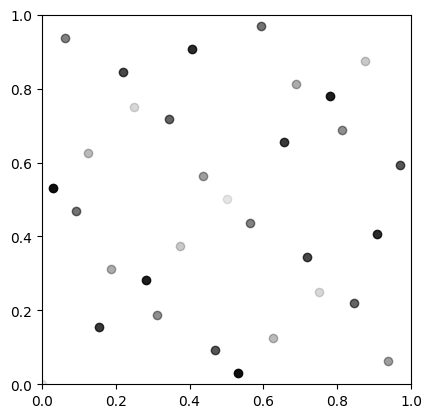

In [2]:
d = 2
m = 5
sobol = qmc.Sobol(d=d, scramble=False)
sample = sobol.random_base2(m=m)
print("discrepancy", qmc.discrepancy(sample))
plt.axes().set_aspect('equal')
for i in range(2**(m-1)):
    plt.scatter(*sample[2*i:2*(i+1)].T, color='k', alpha=0.9*i/(2**(m-1)) + 0.1)
plt.xlim(0, 1)
plt.ylim(0, 1)

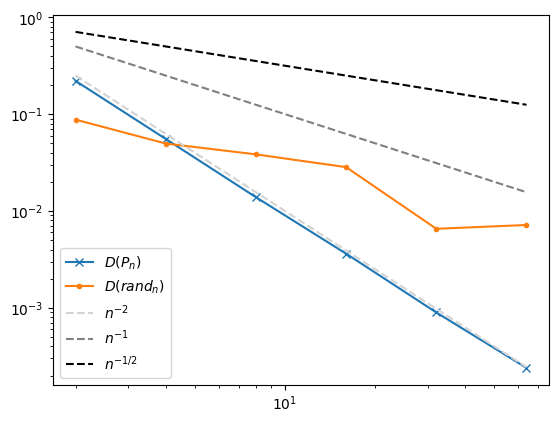

In [3]:
# n vs. discrepancy
d = 2
discps = []
mmax = 7
method = "CD"
for m in range(1, mmax):
    sobol = qmc.Sobol(d=d, scramble=False)
    sample = sobol.random_base2(m=m)
    discps.append(qmc.discrepancy(sample, method=method))

discps_rand = []
for m in range(1, mmax):
    sample_rand = np.random.rand(2**m,2)
    discps_rand.append(qmc.discrepancy(sample_rand, method=method))


n = 2**np.arange(1, mmax)
plt.loglog(n, discps, marker="x", label="$ D(P_n) $")
plt.loglog(n, discps_rand, marker=".", label="$ D(rand_n) $")
plt.loglog(n, 1/n**2, linestyle="--", color="lightgray", label="$ n^{-2} $")
plt.loglog(n, 1/n, linestyle="--", color="gray", label="$ n^{-1} $")
plt.loglog(n, 1/n**0.5, linestyle="--", color="k", label="$ n^{-1/2} $")
plt.legend()

## Halton

discrepancy 0.009016290777176694


(0.0, 1.0)

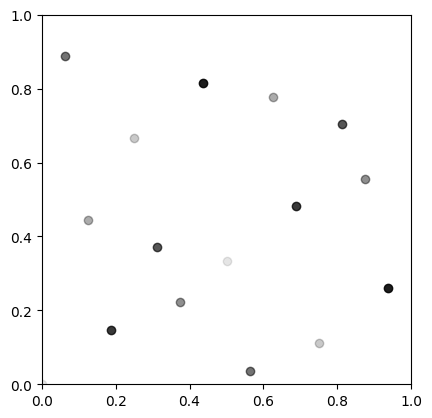

In [4]:
d = 2
m = 4
halton = qmc.Halton(d=d, scramble=False)
sample = halton.random(n=2**m)
print("discrepancy", qmc.discrepancy(sample))

plt.axes().set_aspect('equal')
for i in range(2**(m-1)):
    plt.scatter(*sample[2*i:2*(i+1)].T, color='k', alpha=0.9*i/(2**(m-1)) + 0.1)
plt.xlim(0, 1)
plt.ylim(0, 1)

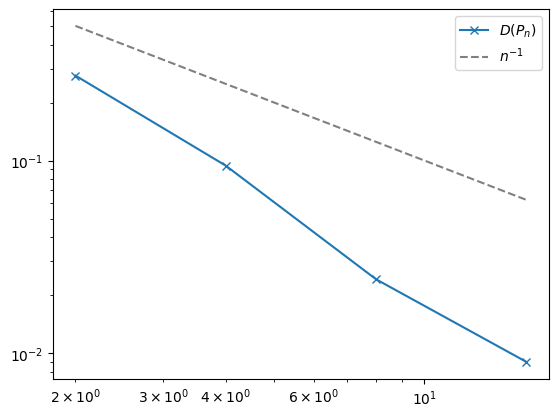

In [5]:
# n vs. discrepancy
d = 2
discps = []
mmax = 5
for m in range(1, mmax):
    halton = qmc.Halton(d=d, scramble=False)
    sample = halton.random(n=2**m)
    discps.append(qmc.discrepancy(sample))

n = 2**np.arange(1, mmax)
plt.loglog(n, discps, marker="x", label="$ D(P_n) $")
plt.loglog(n, 1/n, linestyle="--", color="gray", label="$ n^{-1} $")
plt.legend()